## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [162]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

%matplotlib inline

boston = pd.read_csv('boston.csv')
X = boston.drop(columns=['medv'])
y = boston['medv']

In [163]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [164]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=95)
tree1 = DecisionTreeRegressor(max_depth=8)
tree1.fit(X_train, y_train)

predictions = tree1.predict(X_test)

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})

<Axes: xlabel='Actual', ylabel='Predicted'>

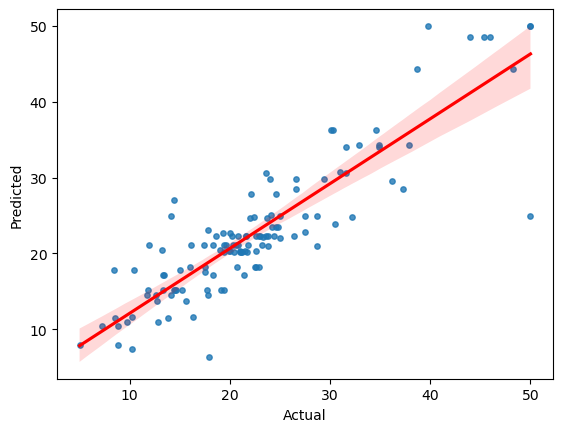

In [166]:
sns.regplot(x='Actual', y='Predicted', data=results_df, label='Predicted Values', scatter_kws={'s': 15}, line_kws={'color': 'red'})

<font color="green">Plotando um regplot para entendermos o quão bem a árvore consegue predizer os valores de X no conjunto de dados de treino</font>

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [167]:
path = tree1.cost_complexity_pruning_path(X_train, y_train)

Text(0, 0.5, 'Impureza Total das folhas')

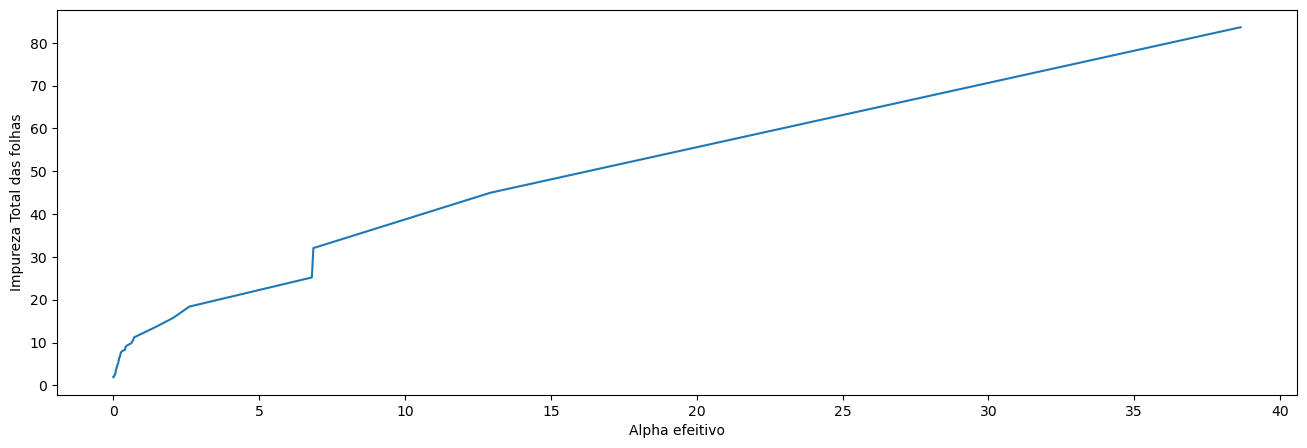

In [168]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(16,5))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efeitivo")
plt.ylabel("Impureza Total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [169]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da Árvore')

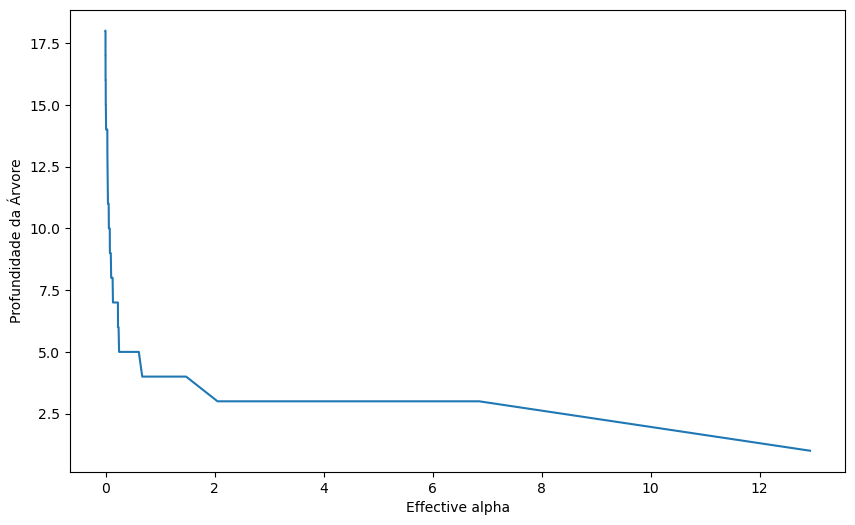

In [170]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("Effective alpha")
plt.ylabel("Profundidade da Árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [171]:
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

<function matplotlib.pyplot.show(close=None, block=None)>

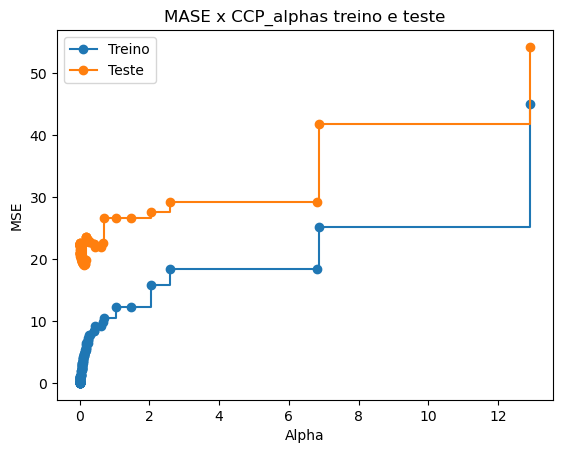

In [172]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MASE x CCP_alphas treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="Treino", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="Teste", drawstyle="steps-post")
ax.legend()
plt.show


In [173]:
min(ccp_alphas) #Verificando o valor minimo da lista de ccp_alphas para determinar o melhor valor para a árvore

0.0

<font color="green">Para a base de Teste, o valor ótimo é o primeiro valor testado para o CCP alpha, um pouco após 0. O padrão se repete para a base de Treino, com o valor de alpha mais próximo de 0 apresentando o MSE mais baixo</font>

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [174]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=0.1)
arvore_final.fit(X_train, y_train)
print(arvore_final.score(X_test, y_test))

0.7727293816300735


<font color="green">Me parece que o padrão seguido pela métrica é que: O valor ótimo para o ccp_alpha, são valores próximos de 0, tirando o próprio 0, por isso treinei a árvore com o valor de 0.1</font>

### 7. Visualize esta árvore.

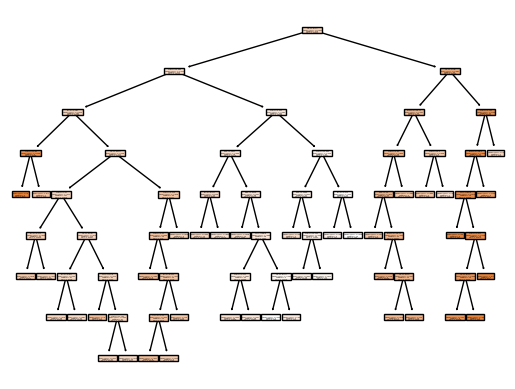

In [176]:
tp = tree.plot_tree(
    arvore_final,
    feature_names=X.columns,
    filled=True
)